# The KS test for DeepAR model

## imports

In [6]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import yaml
from IPython.display import display


In [2]:
from src.RQ1_forecast import *

In [3]:
pd.options.display.max_columns = None

In [4]:
def first_horizon_ks(data_address_val, num_time_series, train_series_number_ks, prediction_length, dataset_name):
    # read the forcast file
    print('reading the experiemtns')
    forcast_list1_val = read_csv_result('forecasts.csv', data_address_val)
    # sort the forcast lists based on their original time series
    print('sorting the experiments')
    sorted_forcast_list1_val = get_sorted_csv(forcast_list1_val, num_time_series=num_time_series)
    target_forcast_series_val = get_forcast_target(forcast_list1_val)
    sample_forcast_list1_val = get_forcast_samples(forcast_list1_val)
    
    # initialize the numpy array
    ks_array = np.zeros((train_series_number_ks, prediction_length))

    # we want to calculate the ks test for the first prediction
    # i from 0 to #ts-1:
    #   j from 168*i to 168*i+24:
    print('calculating the ks test')
    for i in range(train_series_number_ks):
        for j, data_point in enumerate(range(168*i, 168*i+24)):
            ks_table = get_ks_tmp(sample_forcast_list1_val, data_point)  
            ks_array[i,j] = portion_ks_table(ks_table)
        print(f'ts {i}')

    print(f'Mean of {dataset_name} is ={ks_array.mean()}')
    print('\n---------------------------------------------\n')
    return ks_array

def first_horizon_ks_exchange(data_address_val, num_time_series, train_series_number_ks, prediction_length, dataset_name):
    # read the forcast file
    print('reading the experiemtns')
    forcast_list1_val = read_csv_result('forecasts.csv', data_address_val)
    # sort the forcast lists based on their original time series
    print('sorting the experiments')
    sorted_forcast_list1_val = get_sorted_csv(forcast_list1_val, num_time_series=num_time_series)
    target_forcast_series_val = get_forcast_target(forcast_list1_val)
    sample_forcast_list1_val = get_forcast_samples(forcast_list1_val)
    
    # initialize the numpy array
    ks_array = np.zeros((train_series_number_ks, prediction_length))

    # we want to calculate the ks test for the first prediction
    # i from 0 to #ts-1:
    #   j from 168*i to 168*i+24:
    print('calculating the ks test')
    for i in range(train_series_number_ks):
        for j, data_point in enumerate(range(i*30, i*30+30)):
            ks_table = get_ks_tmp(sample_forcast_list1_val, data_point)  
            ks_array[i,j] = portion_ks_table(ks_table)
        print(f'ts {i}')

    print(f'Mean of {dataset_name} is ={ks_array.mean()}')
    print('\n---------------------------------------------\n')
    return ks_array

In [5]:
model_name = 'ar'
with open(f'/home/dev/deepts/configs/ks_config_{model_name}.yaml', "r") as f:
            config = yaml.load(f, Loader=yaml.FullLoader)



# Electricity

9it [00:00, 82.55it/s]reading the experiemtns
101it [00:00, 292.55it/s]
100%|###########| 100/100 [05:35<00:00,  3.36s/it]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of deep_ar_electricity is =0.26929419191919196

---------------------------------------------



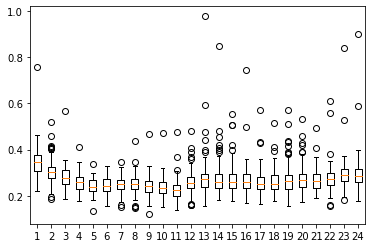

In [6]:
model_name = config['model_name']
dataset_name = "electricity" 
if config[dataset_name] is not None:
    ks_array_electricity = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=321, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_electricity)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')


In [7]:
print(f'the mean is {ks_array_electricity.mean()}')

the mean is 0.26929419191919196


In [8]:
pd.DataFrame({'mean' : ks_array_electricity.mean(axis=0),'std' :ks_array_electricity.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.350186,0.305323,0.279202,0.257422,0.241368,0.246333,0.250515,0.251087,0.242737,0.234869,0.225945,0.258564,0.283202,0.277689,0.270689,0.271232,0.260988,0.265091,0.274107,0.274861,0.269406,0.280333,0.296345,0.295566
std,0.067778,0.052327,0.048501,0.039442,0.032516,0.036963,0.032455,0.041275,0.042743,0.042770,0.045137,0.049954,0.093547,0.082440,0.062127,0.067326,0.054062,0.051867,0.067041,0.058664,0.048130,0.058396,0.070743,0.079234


# Solar_nips

0it [00:00, ?it/s]reading the experiemtns
201it [00:00, 580.31it/s]
100%|###########| 100/100 [03:04<00:00,  1.84s/it]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of deep_ar_solar_nips is =0.36102340067340066

---------------------------------------------



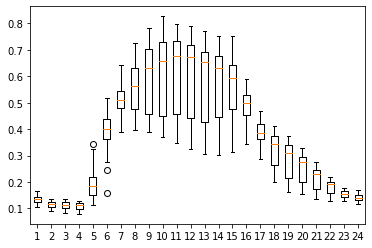

In [9]:
dataset_name = 'solar_nips'
if config[dataset_name] is not None:
    ks_array_solar = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=137, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_solar)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')



In [10]:
print(f'the mean is {ks_array_solar.mean()}')

the mean is 0.36102340067340066


In [11]:
pd.DataFrame({'mean' : ks_array_solar.mean(axis=0),'std' :ks_array_solar.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.133739,0.115592,0.111287,0.110038,0.190871,0.402657,0.509133,0.554596,0.590008,0.607675,0.607238,0.597339,0.578531,0.570891,0.562109,0.490911,0.388038,0.320776,0.282333,0.250788,0.212919,0.181630,0.154636,0.140824
std,0.012472,0.012438,0.013672,0.013621,0.048654,0.059518,0.049385,0.088785,0.126455,0.140908,0.144480,0.144890,0.139354,0.128761,0.102229,0.054673,0.038557,0.060977,0.064646,0.051420,0.040029,0.024993,0.012070,0.012452


# Exchange rate

in exchange rate dataset we did not calculate the first window. we calculate all the windows available which is 40

201it [00:00, 30720.22it/s]
100%|###########| 100/100 [00:11<00:00,  8.55it/s]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
Mean of ar_exchange_rate is =0.050957239057239055

---------------------------------------------



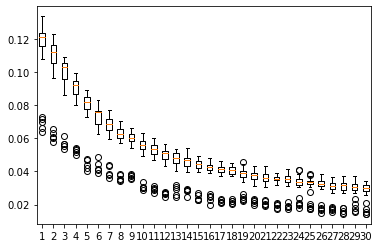

In [27]:
dataset_name = "exchange_rate"
if config[dataset_name] is not None:
    ks_array_exchange = first_horizon_ks_exchange(data_address_val=config[dataset_name], num_time_series=8, train_series_number_ks=40, prediction_length=30, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_exchange)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')

In [28]:
print(f'the mean is {ks_array_exchange.mean()}')

the mean is 0.050957239057239055


In [29]:
pd.DataFrame({'mean' : ks_array_exchange.mean(axis=0),'std' :ks_array_exchange.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
mean,0.114495,0.105854,0.096419,0.087035,0.077480,0.070778,0.065374,0.060136,0.057682,0.053207,0.050894,0.047697,0.046076,0.044419,0.042303,0.040747,0.039348,0.038631,0.037505,0.036040,0.034975,0.033793,0.033763,0.032843,0.031818,0.031253,0.029904,0.029783,0.029672,0.028793
std,0.018087,0.017838,0.015859,0.013715,0.013165,0.011298,0.010460,0.009700,0.008282,0.009107,0.008659,0.008593,0.007334,0.006971,0.007125,0.006797,0.006865,0.006685,0.005687,0.005864,0.005916,0.005723,0.005985,0.005241,0.005419,0.005687,0.005253,0.005584,0.004850,0.005204


# Traffic_nips

39it [00:00, 387.28it/s]reading the experiemtns
101it [00:00, 716.67it/s]
100%|###########| 100/100 [15:29<00:00,  9.29s/it]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of ar_traffic_nips is =0.32827104377104377

---------------------------------------------



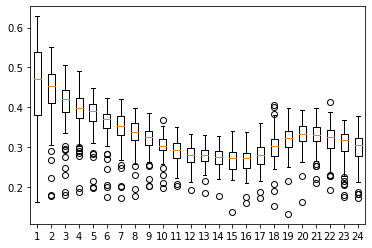

In [6]:
dataset_name = 'traffic_nips'
if config[dataset_name] is not None:
    ks_array_traffic = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=963, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_traffic)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')

In [7]:
print(f'the mean is {ks_array_traffic.mean()}')

the mean is 0.32827104377104377


In [8]:
pd.DataFrame({'mean' : ks_array_traffic.mean(axis=0),'std' :ks_array_traffic.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.451291,0.435622,0.408133,0.391473,0.379964,0.360309,0.348267,0.335461,0.320002,0.303984,0.290800,0.278703,0.276766,0.273691,0.269301,0.268204,0.279913,0.301485,0.319814,0.332313,0.330566,0.320044,0.306051,0.296349
std,0.106038,0.071732,0.058290,0.049588,0.045304,0.043647,0.043180,0.036892,0.031280,0.027584,0.028434,0.026297,0.023695,0.026930,0.031399,0.033313,0.032927,0.037771,0.035415,0.033371,0.034879,0.039278,0.041578,0.042021


# Weight and Batches initialized differently

In [15]:
# load the model config
model_name = 'ar'
with open(f'/home/dev/deepts/configs/ks_config_{model_name}.yaml', "r") as f:
            config = yaml.load(f, Loader=yaml.FullLoader)

# electricity

## increament batch seeds

101it [00:00, 26723.74it/s]
  0%|                     | 0/100 [00:00<?, ?it/s]/home/dev/deepts/experiments/deep_ar/electricity/10A
reading the experiemtns
100%|###########| 100/100 [05:30<00:00,  3.30s/it]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of deep_ar_electricity_batch is =0.570589898989899

---------------------------------------------



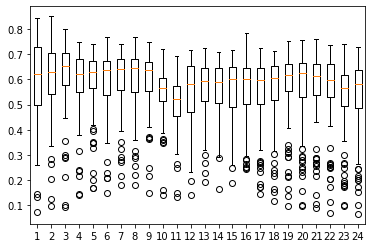

In [16]:
model_name = config['model_name']
dataset_name = "electricity_batch" 
print(config[dataset_name])
if config[dataset_name] is not None:
    ks_array_electricity = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=321, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_electricity)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')


## increamernt weight seeds

101it [00:00, 24237.60it/s]
  0%|                     | 0/100 [00:00<?, ?it/s]/home/dev/deepts/experiments/deep_ar/electricity/10B
reading the experiemtns
100%|###########| 100/100 [05:27<00:00,  3.27s/it]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of deep_ar_electricity_weight is =0.43609191919191914

---------------------------------------------



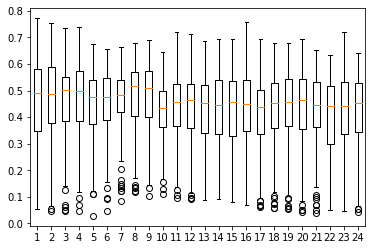

In [17]:
model_name = config['model_name']
dataset_name = "electricity_weight" 
print(config[dataset_name])
if config[dataset_name] is not None:
    ks_array_electricity = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=321, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_electricity)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')
